## **Project Overview**
This project aims to analyze sentiment from tweeter posts using NLP techniques.The dataset contains 1,600,000 tweets, extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.



In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
import re
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Loading dataset**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
data.shape

(1599999, 6)

## **Data Processing**

In [4]:
column_names=['Sentiment_score','Id','Date','Flag','Username','text']
data=pd.read_csv("/content/drive/MyDrive/Datasets/training.1600000.processed.noemoticon.csv",names=column_names,encoding='ISO-8859-1')
data

,Sentiment_score,Id,Date,Flag,Username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Sentiment_score  1600000 non-null  int64 
 1   Id               1600000 non-null  int64 
 2   Date             1600000 non-null  object
 3   Flag             1600000 non-null  object
 4   Username         1600000 non-null  object
 5   text             1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
#Checking Missing values
data.isnull().sum()

,0
Sentiment_score,0
Id,0
Date,0
Flag,0
Username,0
text,0


In [7]:
#Checking Distribution of sentiment_score column
print(data['Sentiment_score'].value_counts())

Sentiment_score
0    800000
4    800000
Name: count, dtype: int64


In [8]:
#Coverting score '4' to '1'
data['Sentiment_score']=[1 if Target>3 else 0 for Target in data['Sentiment_score']]

In [9]:
data=data[['Sentiment_score','text','Date']]
data

,Sentiment_score,text,Date
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon Apr 06 22:19:45 PDT 2009
1,0,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009
2,0,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009
3,0,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009
4,0,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,Tue Jun 16 08:40:49 PDT 2009
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,Tue Jun 16 08:40:49 PDT 2009
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,Tue Jun 16 08:40:49 PDT 2009
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,Tue Jun 16 08:40:49 PDT 2009


In [10]:
#Checking data types
data.dtypes

,0
Sentiment_score,int64
text,object
Date,object


In [11]:
#Converting datatype of 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [12]:
#Labelling sentiment scores
def sentiment(label):
    if label ==0:
        return "Negative"
    else:
        return "Positive"

In [13]:
data['sentiment'] = data['Sentiment_score'].apply(sentiment)

### **Text Processing**

In [14]:
stop_words=nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

In [15]:
ps=nltk.porter.PorterStemmer()

In [16]:
def simple_text_preprocessor(document):
    # lower case
    document=str(document).lower()
    # remove unnecessary characters
    document=re.sub(r'[^a-zA-Z]',r' ',document)
    document=re.sub(r'nbsp',r'',document)
    document=re.sub(' +',' ',document)
    # simple porter stemming
    document=' '.join([ps.stem(word) for word in document.split()])
    # stopwords removal
    document=' '.join([word for word in document.split() if word not in stop_words])

    return document

stp=np.vectorize(simple_text_preprocessor)

In [17]:
data['Cleaned text']=stp(data['text'].values)

In [18]:
data.head()

,Sentiment_score,text,Date,sentiment,Cleaned text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,Negative,switchfoot http twitpic com zl awww bummer sho...
1,0,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,Negative,upset updat hi facebook text might cri result ...
2,0,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,Negative,kenichan dive mani time ball manag save rest g...
3,0,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,Negative,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Negative,nationwideclass no not behav mad whi becaus see


## **EDA**

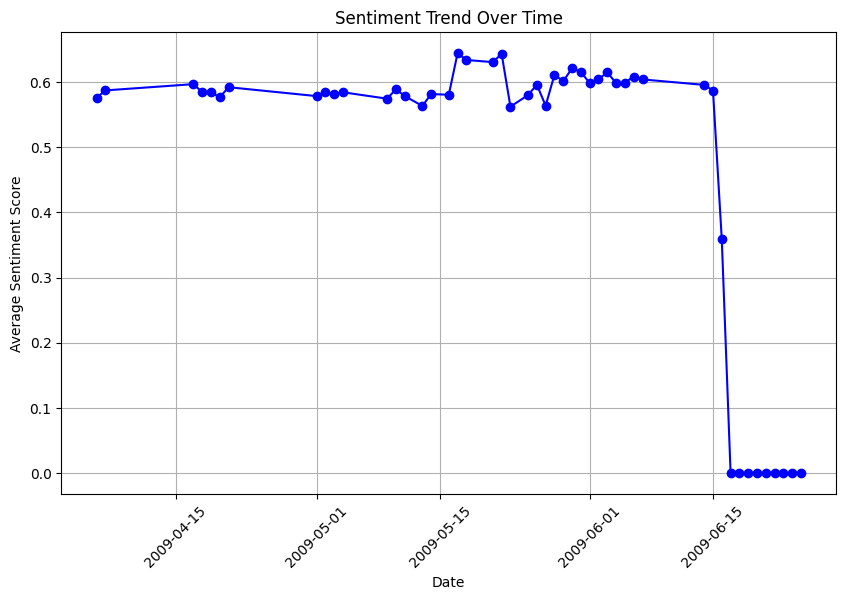

In [19]:
sentiment_trend = data.groupby(data['Date'].dt.date)['Sentiment_score'].mean()

# Plot of sentiment trend over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

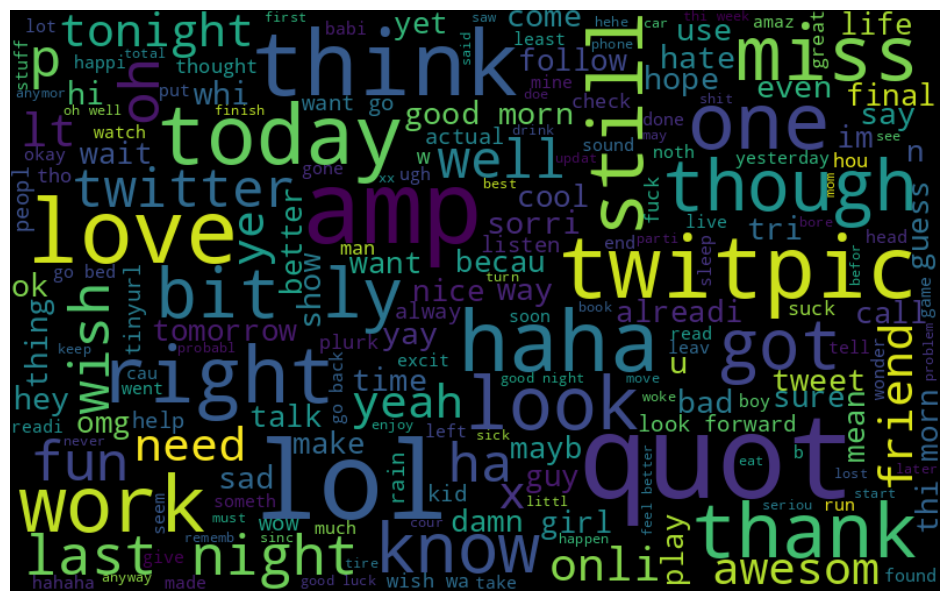

In [20]:
# Word Visualization
all_words=" ".join([word for word in data['Cleaned text']])

wordcloud=WordCloud(width=800, height=500,max_font_size=100).generate(all_words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

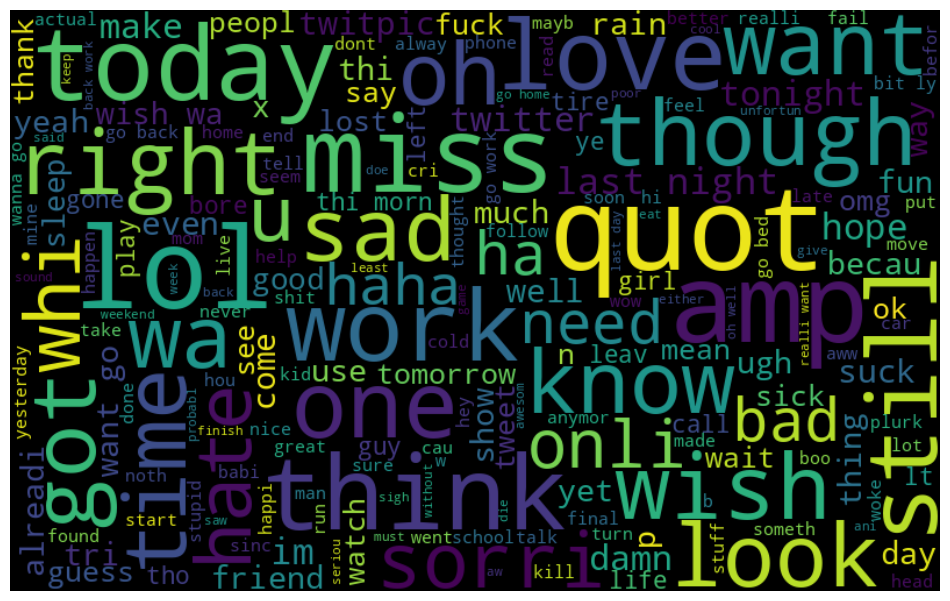

In [21]:
# Negative Word Visualization
neg_words=" ".join([word for word in data['Cleaned text'][data['Sentiment_score']==0]])

wordcloud=WordCloud(width=800, height=500,max_font_size=100).generate(neg_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

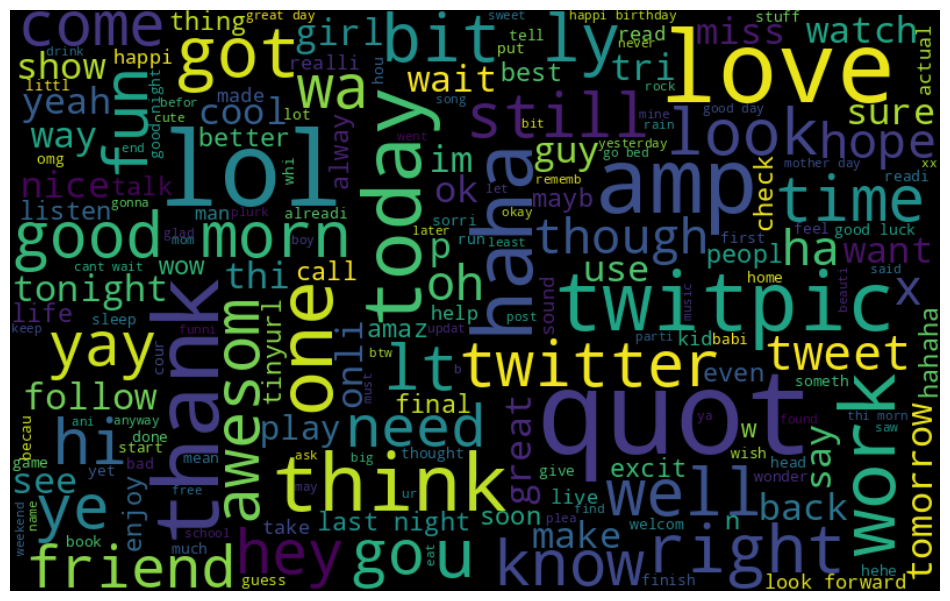

In [22]:
# Positive Word Visualization
pos_words=" ".join([word for word in data['Cleaned text'][data['Sentiment_score']==1]])
wordcloud=WordCloud(width=800, height=500,max_font_size=100).generate(pos_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## **train-test-split**

In [23]:
X_train,X_test,y_train,y_test=train_test_split(data['Cleaned text'],data['Sentiment_score'],test_size=0.2,random_state=42)

In [24]:
X_train.shape,X_test.shape

((1280000,), (320000,))

In [25]:
y_train.shape, y_test.shape

((1280000,), (320000,))

In [26]:
y_train.value_counts()

,count
Sentiment_score,
0,640506
1,639494


In [27]:
y_test.value_counts()

,count
Sentiment_score,
1,160506
0,159494


In [28]:
X_train.head()

,Cleaned text
1374558,jbtaylor ya quot like palm pre touchston charg...
1389115,felt earthquak thi afternoon seem but epicent
1137831,ruffl shirt like likey
790714,pretti bad night crappi morn fml onli buttfac ...
1117911,dcbriccetti yeah clear view


In [29]:
X_test.head()

,Cleaned text
541200,chrishasboob ahhh hope ok
750,misstoriblack cool no tweet app razr
766711,tiannachao know famili drama lame hey next tim...
285055,school email open geographi stuff revis stupid...
705995,upper airway problem


### **CountVectorizer**

In [30]:
#Vectorization of cleaned text to numbers
tfidf=TfidfVectorizer()
X_traincv=tfidf.fit_transform(X_train)

X_testcv=tfidf.transform(X_test)

## **Model training and Evaluation**

In [31]:
lr=LogisticRegression(solver='liblinear',class_weight='balanced',random_state=42)

In [32]:
lr.fit(X_traincv,y_train)
lr_pred=lr.predict(X_testcv)

In [33]:
lr_accuracy =accuracy_score(y_test,lr_pred)
print("Accuracy on test data: ",lr_accuracy)

print(classification_report(y_test,lr_pred))

Accuracy on test data:  0.78710625
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



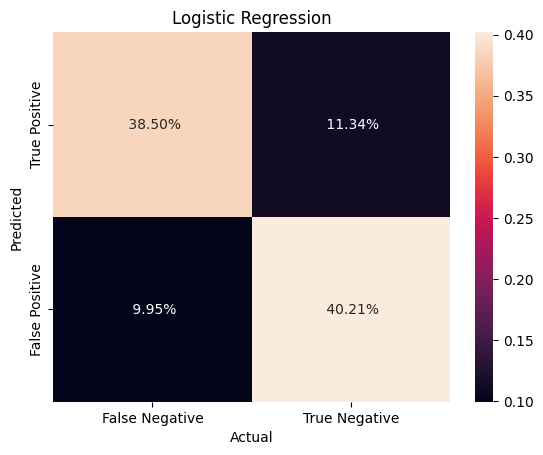

In [34]:
lr_cnf_mtrx= confusion_matrix(y_test,lr_pred)
ax=sns.heatmap(lr_cnf_mtrx/np.sum(lr_cnf_mtrx),fmt=' .2%', annot=True)
ax.set_title("Logistic Regression")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive'])
plt.show()

## **Model Deployment**

In [35]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),LogisticRegression(solver='liblinear',class_weight='balanced',random_state=42))

In [36]:
text_model.fit(X_train,y_train)
y_pred=text_model.predict(X_test)

In [37]:
joblib.dump(text_model,open('lr.pkl','wb'))

In [38]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [39]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import re
import nltk
nltk.download('stopwords')
stop_words=nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')
ps=nltk.porter.PorterStemmer()
import numpy as np
import matplotlib.pyplot as plt

def simple_text_preprocessor(document):
    # lower case
    document=str(document).lower()
    # remove unnecessary characters
    document=re.sub(r'[^a-zA-Z]',r' ',document)
    document=re.sub(r'nbsp',r'',document)
    document=re.sub(' +',' ',document)
    # simple porter stemming
    document=' '.join([ps.stem(word) for word in document.split()])
    # stopwords removal
    document=' '.join([word for word in document.split() if word not in stop_words])

    return document

model = joblib.load(open('lr.pkl','rb'))
st.title("Twitter Sentiment Analysis")
tweet= st.text_input("Enter your tweet: ")

if st.button("Predict"):
    prediction = model.predict([simple_text_preprocessor(tweet)])
    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    st.subheader(f"The above tweet is {sentiment}")



Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.152.163:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://calm-birds-move.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Conclusion**
The sentiment analysis model successfully classifies tweeter posts as positive or negative, demonstrating the effectiveness of NLP techniques and machine learning in text classification tasks. The Logistic Regression model provided promising results, with reasonable accuracy and well-distributed predictions. Further improvements can be made by experimenting with advanced NLP techniques, such as deep learning models (e.g., LSTMs, transformers). Overall, this project showcases how data-driven sentiment analysis can be leveraged for actionable insights in social media monitoring.